## [Tower of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi)

* [Video to understand the behaviour and pesudo code](https://www.youtube.com/watch?v=rVPuzFYlfYE)
* [Geeks for Geeks explaination and code](http://www.geeksforgeeks.org/c-program-for-tower-of-hanoi/)    

### The time complexity is 2^n -1
TODO:
* Proof of time of complexity

In [13]:
import matplotlib.pyplot as plt
from timeit import default_timer as timer
%matplotlib inline

In [14]:
def print_move(peg, from_tower, to_tower):
    """To print the movement of pegs."""

    print "Moving peg %d from %s to %s" % (peg, from_tower, to_tower)

In [15]:
def hanoi_without_prints(pegs, from_tower, to_tower, spare_tower):
    """Solve the hanoi problem recursively.
       Move the first N-1 pegs from source tower to spare tower.
       Move the last Nth peg from source tower to target tower.

       :param pegs: The number of pegs to be transfered.
       :param from_tower: The tower where the peg is initally.
       :param to_tower: The target tower where the peg is moved to.
       :param spare_tower: The tower to be used as a temopary tower."""

    # Does not print any movement.
    if pegs == 1:
        pass
    else:
        hanoi_without_prints(pegs - 1, from_tower, spare_tower, to_tower)
        hanoi_without_prints(1, from_tower, to_tower, spare_tower)
        hanoi_without_prints(pegs - 1, spare_tower, to_tower, from_tower)

In [16]:
def hanoi_with_prints(pegs, from_tower, to_tower, spare_tower):
    """Solve the hanoi problem recursively.
       Move the first N-1 pegs from source tower to spare tower.
       Move the last Nth peg from source tower to target tower.

       :param pegs: The number of pegs to be transfered.
       :param from_tower: The tower where the peg is initally.
       :param to_tower: The target tower where the peg is moved to.
       :param spare_tower: The tower to be used as a temopary tower."""

    # Prints movement of each peg.
    if pegs == 1:
        print_move(1, from_tower, to_tower)
    else:
        hanoi_with_prints(pegs - 1, from_tower, spare_tower, to_tower)
        print_move(pegs, from_tower, to_tower)
        hanoi_with_prints(pegs - 1, spare_tower, to_tower, from_tower)

In [28]:
def compute_time_to_solve():
    """Calculate the time to execute the tower of hanoi problem recursively for varying input size.
       Also, plots the graph of input size vs execution time for these computed values. 
       
       :return time_to_solve: Return a dictonary containing the time to execute for a given input size."""
    
    max_limit = 35
    time_to_solve = {n: 0 for n in range(1, max_limit)}
    for n in time_to_solve:
        start = timer()
        hanoi_without_prints(n, 1, 2, 3)
        end = timer()
        time_to_solve[n] = end - start
    X_values = time_to_solve.keys()
    Y_values = time_to_solve.values()
    plot_curve(X_values, Y_values)
    return time_to_solve

In [40]:
def plot_curve(X_values, Y_values, suffix=""):
    """Plot and display a curve given the values for input size vs execution time. 

        :param X_values: The list of values for X-axis; input size.
        :param Y_vlaues: The list of values for Y-axis; execution time.
        :param suffix: Any additional title message to be displayed."""

    plt.plot(X_values, Y_values)
    plt.xlabel('Number of pegs (Whole Number)')
    plt.ylabel('Time to solve (Seconds)')
    plt.title("Input size vs Execution Time" +" "+ suffix)

In [39]:
def extrapolate_time_to_solve(time_to_solve):
    """Based on the computed time to execute, extrapolate the time to execute for a larger input size.
       Max limit set to 64, the initial Tower of Hanoi problem value.
       
       :param time_to_solve: The time to solve dictonary of value.
       
       :return time_to_solve: Return a dictonary containing the time to execute extrapolated."""
    
    start_point = 35
    for i in range(start_point, 65):
        time_to_solve[i] = time_to_solve[i - 1] + time_to_solve[i - 1]
    X_values = time_to_solve.keys()
    Y_values = time_to_solve.values()
    plot_curve(X_values, Y_values, "Extrapolated")
    return time_to_solve

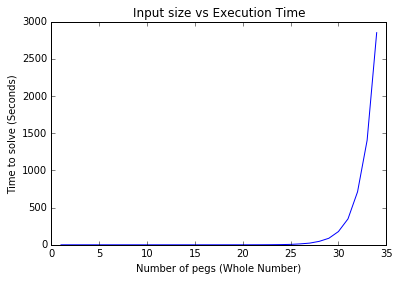

In [29]:
time_to_solve = compute_time_to_solve()

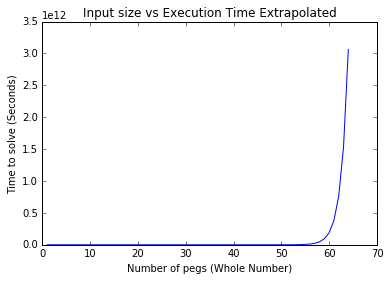

In [41]:
time_to_solve = extrapolate_time_to_solve(time_to_solve)